In [75]:
import numpy as np

# Matrix Creation and Initial Operations

## Matrix Initialization

In [4]:
A = np.random.randint(0,10,9).reshape(3,3)
A

array([[3, 8, 9],
       [9, 4, 2],
       [0, 6, 9]])

In [5]:
B = np.random.randint(0,10,9).reshape(3,3)
B

array([[4, 3, 4],
       [1, 6, 2],
       [8, 6, 4]])

In [8]:
I = np.identity(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
diag_values= [2,3,4]
D= np.diag(diag_values)
D

array([[2, 0, 0],
       [0, 3, 0],
       [0, 0, 4]])

### 1. Construct  a combined matrix C

In [14]:
A_transpose = A.T
A_inv = np.linalg.inv(A)
B_transpose = B.T
D_inv = np.linalg.inv(D)
A_square = np.linalg.matrix_power(A,2)

In [18]:
C = (A * B + A_transpose) + (np.dot(A,B) + A_transpose) +((np.dot(A,B)-B_transpose) + (A_square + I)) + (np.dot(A_inv, B_transpose)+ (np.dot(A,B))) + (np.dot((np.dot(A, A_transpose)),A_inv))+ (np.dot(A+B, A-B))+(np.dot(D_inv,A)+np.dot(D, A_inv))+(np.dot(A,B)+np.dot(B,A))

In [19]:
C

array([[432.22222222, 715.27777778, 646.95555556],
       [454.23333333, 444.36666667, 395.17777778],
       [373.66666667, 644.83333333, 636.65      ]])

# Fundamental Matrix Analysis

## Core Linear Algebra Operations

### Basic Transformation

In [20]:
C_transpose = C.T
C_transpose

array([[432.22222222, 454.23333333, 373.66666667],
       [715.27777778, 444.36666667, 644.83333333],
       [646.95555556, 395.17777778, 636.65      ]])

In [21]:
np.allclose(C, C_transpose, rtol=1e-5)

False

In [22]:
np.allclose(C, -C_transpose, rtol=1e-5)

False

### Determinant and Linear Independence

In [24]:
C_determinant = np.linalg.det(C)
C_determinant

np.float64(-7017769.876018541)

In [26]:
C_rank = np.linalg.matrix_rank(C)
C_rank

np.int64(3)

In [30]:
result = C_rank == 3
result
    

np.True_

In [31]:
C.shape[1]

3

In [34]:
nullity = C.shape[1] - C_rank
nullity

np.int64(0)

### Matrix Inverse Operations

In [35]:
C_inv = np.linalg.inv(C)

In [39]:
C_dot = (np.dot(C, C_inv))
result = np.allclose(C_dot, I)
result

True

In [41]:
C_pseudo_inv = np.linalg.pinv(C)
C_pseudo_inv

array([[-0.00400159,  0.00544376,  0.00068734],
       [ 0.02016636, -0.00476342, -0.01753608],
       [-0.01807694,  0.00162955,  0.01892879]])

In [42]:
result = C_inv == C_pseudo_inv
result

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

### Eigenvalue Analysis

In [43]:
eigenvalues, eigenvectors = np.linalg.eig(C)
print(eigenvalues, eigenvectors)

[1556.17584214  -91.97039675   49.0334435 ] [[-0.64625943 -0.5521302  -0.1190098 ]
 [-0.47602934  0.74435964 -0.63020839]
 [-0.59644348 -0.37560746  0.76725097]]


In [46]:
np1 = C @ eigenvectors
np2 = eigenvalues * eigenvectors
np.allclose(np1,np2)

True

In [48]:
trace_ = np.trace(C)
trace_

np.float64(1513.238888888889)

In [50]:
det_ = np.prod(eigenvalues)
det_

np.float64(-7017769.876018543)

In [51]:
diag_elem= np.diag(C)

In [52]:
np.allclose(diag_elem, trace_)

False

### Linear System Solution

In [61]:
b_transpose = np.array([[1,2,3]])
b_transpose

array([[1, 2, 3]])

In [62]:
b = np.transpose(b_transpose)
b

array([[1],
       [2],
       [3]])

In [64]:
x = np.linalg.solve(C,b)
x

array([[ 0.00894796],
       [-0.0419687 ],
       [ 0.04196853]])

In [65]:
C_x = np.dot(C,x)

In [66]:
np.allclose(C_x,b)

True

In [67]:
x2= C_inv @ b

In [68]:
x2

array([[ 0.00894796],
       [-0.0419687 ],
       [ 0.04196853]])

In [71]:
x3 = np.linalg.lstsq(C,b, rcond= None)
x3

(array([[ 0.00894796],
        [-0.0419687 ],
        [ 0.04196853]]),
 array([], dtype=float64),
 np.int32(3),
 array([1615.53703709,  164.46102818,   26.4130895 ]))

### Matrix Decompositon

In [76]:
pip install scipy

  Using cached scipy-1.16.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached scipy-1.16.3-cp313-cp313-macosx_14_0_arm64.whl (20.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [77]:
from scipy.linalg import lu,qr,cholesky

In [79]:
P, L, U= lu(C)
print(P)
print(L)
print(U)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
[[1.         0.         0.        ]
 [0.95154228 1.         0.        ]
 [0.82263154 0.95499718 1.        ]]
[[454.23333333 444.36666667 395.17777778]
 [  0.         292.44410606 270.92719139]
 [  0.           0.          52.82959103]]


In [80]:
Q, R = qr(C)
print(Q)
print(R)

[[-0.59215705  0.41737149 -0.68931202]
 [-0.62231292 -0.78029831  0.06213835]
 [-0.51193423  0.46576344  0.72179482]]
[[ -729.91146605 -1030.20415494  -954.94645983]
 [    0.           252.13778129   258.19254308]
 [    0.             0.            38.13212518]]


In [83]:
np.allclose(C, C_transpose)

False

In [84]:
np.all(eigenvalues>0)

np.False_

In [85]:
##Cholesky Decomposition can not be done

### Matrix Norms and Conditioning

In [86]:
fro_norm = np.linalg.norm(C, 'fro')
fro_norm

np.float64(1624.1012897261437)

In [87]:
one_norm = np.linalg.norm(C,1)
one_norm

np.float64(1804.4777777777776)

In [88]:
inf_norm = np.linalg.norm(C, np.inf)
inf_norm

np.float64(1794.4555555555555)

In [89]:
two_norm = np.linalg.norm(C,2)
two_norm

np.float64(1615.5370370876376)

In [91]:
np.linalg.cond(C)

np.float64(61.164258624964695)

### Advanced Matrix Functions

In [92]:
from scipy.linalg import expm,logm,sqrtm,sinm,cosm

In [93]:
np3 = expm(C)
np3

array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

In [96]:
np.all(eigenvalues>0)

np.False_

In [97]:
## no log
np4 = logm(C)
np4

array([[5.32878436+1.83798412j, 1.21471718-1.40573741j,
        1.22053488-0.86955822j],
       [0.29081781-2.47789596j, 5.37397804+1.8951584j ,
        1.26197095+1.17230326j],
       [1.23628695+1.25035823j, 1.18936703-0.95630605j,
        5.06119364-0.59154987j]])

In [98]:
np5 = sqrtm(C)
np5

array([[12.93094781+5.61068533j, 17.17361651-4.29119609j,
        15.0257404 -2.65443943j],
       [12.90760543-7.56409935j, 13.12020241+5.78521725j,
         7.02720425+3.57860803j],
       [ 6.4655509 +3.81688095j, 15.08958785-2.91924848j,
        20.39963287-1.80578284j]])

In [110]:
np6 = sinm(C)
np6

array([[ 0.07144012, -0.73738759, -0.44830116],
       [-1.33067974,  0.1030102 ,  0.65291095],
       [ 0.69455223, -0.49557666, -1.24249418]])

In [111]:
np7 = cosm(C)
np7

array([[-0.48821392,  0.09430743, -0.0498112 ],
       [ 0.59279065, -0.51385693, -0.60308424],
       [-0.61794846, -0.01952644,  0.22042543]])

### Matrix Powers and Products


In [112]:
np8 = C @ C_transpose
np8

array([[1116989.83962963,  769837.80135802, 1034626.24518519],
       [ 769837.80135802,  559955.13160494,  707864.22666667],
       [1034626.24518519,  707864.22666667,  960760.02805556]])

In [113]:
np9 = C_transpose @ C
np9

array([[ 532770.7482716 ,  751957.82506173,  697026.37049383],
       [ 751957.82506173, 1124894.06160494, 1048889.90561728],
       [ 697026.37049383, 1048889.90561728,  980040.18941358]])

In [114]:
np.allclose(np8,np9)

False

In [115]:
# It proves the non commutativity of the matrix ie, A.B != B.A



In [117]:
np10 = np.linalg.matrix_power(C,3)
np10

array([[1.16398359e+09, 1.63111708e+09, 1.52030450e+09],
       [8.58386443e+08, 1.20074954e+09, 1.11932676e+09],
       [1.07427799e+09, 1.50528758e+09, 1.40317180e+09]])

In [119]:
np11 = np.linalg.matrix_power(C,-3)
np11

array([[ 1.46897399e-07,  7.00259882e-07, -7.17765565e-07],
       [ 5.77383639e-06, -1.13661916e-07, -6.16514999e-06],
       [-6.30649279e-06, -4.14190131e-07,  7.16405750e-06]])

In [120]:
np.allclose((np11@np10),I)

True

### Matrix Property and Testing

In [122]:
np.allclose(C,C_transpose)

False

C is not symmetric

In [124]:
np.all(eigenvalues > 0)

np.False_

C is not postive definite

In [126]:
np.allclose((C@C_transpose), I)

False

C is not orthogonal

In [127]:
C_star = C.conj().T
C_star

array([[432.22222222, 454.23333333, 373.66666667],
       [715.27777778, 444.36666667, 644.83333333],
       [646.95555556, 395.17777778, 636.65      ]])

In [128]:
np.allclose(C@C_star,C_star@C)

False

C is not normal

In [129]:
np.allclose(C,C_star)

False

C is not Hermitian

### Spectral Analysis

In [130]:
spectral_radius = max(eigenvalues)
spectral_radius

np.float64(1556.1758421350073)

In [133]:
np12 = (eigenvectors @ np.diag(eigenvalues) @ np.linalg.inv(eigenvectors))
np12

array([[432.22222222, 715.27777778, 646.95555556],
       [454.23333333, 444.36666667, 395.17777778],
       [373.66666667, 644.83333333, 636.65      ]])

In [135]:
# Compute singular values
singular_values = np.linalg.svd(C, compute_uv=False)
print("Singular values:", singular_values)

Singular values: [1615.53703709  164.46102818   26.4130895 ]


In [136]:
# Spectral norm = largest singular value
spectral_norm = singular_values[0]
print("Spectral norm:", spectral_norm)

Spectral norm: 1615.5370370876376


In [138]:
C_diag = np.diag(C)
C_diag

array([432.22222222, 444.36666667, 636.65      ])

# 3. Advanced Computational Challenges

## 3.1 Expert Level Operations

### A1. Singular Value Decomposition

In [141]:
U, s, Vt = np.linalg.svd(C, full_matrices = True)
print("Singular values:", U, s, Vt)

Singular values: [[-0.65368293  0.22642019 -0.72210285]
 [-0.45443066 -0.8804464   0.13530305]
 [-0.60513751  0.41659097  0.67842505]] [1615.53703709  164.46102818   26.4130895 ] [[-0.44262282 -0.65595002 -0.61140381]
 [-0.89016898  0.23923019  0.38777327]
 [ 0.10809363 -0.71589     0.6897951 ]]


In [142]:
s

array([1615.53703709,  164.46102818,   26.4130895 ])

In [144]:
rank = np.sum(s > 1e-10)
rank

np.int64(3)

In [145]:
U, s, Vt = np.linalg.svd(C, full_matrices = False)

In [146]:
k =2
U_k = U[:, :k]
S_k = np.diag(s[:k])
Vt_k = Vt[:k, :]
C_approx = U_k @ S_k @ Vt_k

print("Low-rank approximation (rank 2):\n", C_approx)

Low-rank approximation (rank 2):
 [[434.28388849 701.62363128 660.11199487]
 [453.84703138 446.92509406 392.7126076 ]
 [371.72970429 657.66158219 624.28935354]]


In [147]:
error = np.linalg.norm(C - C_approx, 'fro')
print("Frobenius norm of approximation error:", error)


Frobenius norm of approximation error: 26.4130894971437


### A2. PCA

In [152]:
points = np.random.randn(100, 3) 
points


array([[ 1.16627855,  1.80486239,  1.36987944],
       [ 3.36756852,  0.36768398, -0.09828135],
       [ 1.65088984, -1.34845084, -0.06817181],
       [ 0.10904341, -0.44356033, -0.05786009],
       [-0.00850208,  0.07441058,  0.26848661],
       [-0.16549736, -0.29971445, -0.65812203],
       [-0.12534868,  1.13569839, -0.03790607],
       [-0.13316203,  0.53255397, -0.95163375],
       [-0.9175656 ,  1.05194937, -0.76043925],
       [-1.13361149, -0.32716145,  1.18708816],
       [-0.28494944, -0.08797951,  1.07119619],
       [-0.62592565,  0.09251747,  0.3571098 ],
       [ 1.07264727, -1.10988136, -0.64726378],
       [ 1.61375856,  2.3621827 ,  1.39729395],
       [ 1.11804865, -1.69688929, -0.03576177],
       [-0.20880251, -0.29973211,  0.01828499],
       [ 0.36142674,  0.1713641 ,  0.83422265],
       [-1.14129051,  1.5586307 ,  1.79891089],
       [-0.23651821,  0.38149455,  0.11053589],
       [ 2.58356477, -0.50865693,  2.26477886],
       [ 0.53544585, -0.16578537, -1.203

In [163]:
points_centered = points - np.mean(points, axis=0)

In [166]:
cov_matrix = np.cov(points_centered.T)
print("Covariance matrix:\n", cov_matrix)


Covariance matrix:
 [[ 1.14988604 -0.08860035 -0.04557664]
 [-0.08860035  0.90249017  0.10593612]
 [-0.04557664  0.10593612  0.85441587]]


In [157]:
U, s, Vt = np.linalg.svd(points_centered, full_matrices=False)

In [159]:
eigvals = (s**2) / (points_centered.shape[0]-1)
print("Eigenvalues of covariance matrix:", eigvals)

Eigenvalues of covariance matrix: [1.19637641 0.94173795 0.76867772]


In [160]:
eigvecs = Vt.T
print("Eigenvectors of covariance matrix:\n", eigvecs)

Eigenvectors of covariance matrix:
 [[-0.90538658  0.42058598 -0.05815985]
 [ 0.35623219  0.6779313  -0.6430457 ]
 [ 0.23102763  0.60292336  0.76361617]]


In [162]:
k = 2 
X_pca = points_centered @ eigvecs[:, :k]

print("Projected data onto top 2 principal components:\n", X_pca)


Projected data onto top 2 principal components:
 [[-0.07176248  2.44773392]
 [-2.9159358   1.51406896]
 [-1.96606429 -0.3532098 ]
 [-0.24536379 -0.38201802]
 [ 0.12097333  0.11645474]
 [-0.08423282 -0.76188034]
 [ 0.53404438  0.60205962]
 [ 0.11516269 -0.36102481]
 [ 1.05454773 -0.22354393]
 [ 1.20880174 -0.07514243]
 [ 0.49886457  0.37406789]
 [ 0.70690501 -0.07751674]
 [-1.49133133 -0.78382488]
 [-0.27203594  3.03029148]
 [-1.6002744  -0.7939919 ]
 [ 0.11123749 -0.37228426]
 [-0.04871664  0.67886492]
 [ 2.02888204  1.56894764]
 [ 0.40031829  0.13350401]
 [-1.97235797  2.01497324]
 [-0.79705365 -0.70486163]
 [ 1.0577071  -1.04314679]
 [ 0.14390028 -1.05945226]
 [-0.6378816   2.5614649 ]
 [-0.20984583 -0.02406073]
 [-0.49138549  0.30248571]
 [ 0.42752204 -0.77086002]
 [-0.4294724  -0.16286794]
 [-1.05885045  0.85020138]
 [ 0.71351394  1.25004451]
 [-0.82420698 -0.40062483]
 [ 1.13642047  0.15597531]
 [ 0.25958074 -0.17527729]
 [ 0.90246208  0.97729133]
 [-0.56576683  1.47698595]
 [ 0.1

### A3 Matrix Regularization and Stability

In [167]:
alpha = 0.1
C_reg = C + alpha * I

In [168]:
C_reg

array([[432.32222222, 715.27777778, 646.95555556],
       [454.23333333, 444.46666667, 395.17777778],
       [373.66666667, 644.83333333, 636.75      ]])

In [170]:
U, s, Vt = np.linalg.svd(C)
cond_num_C = s[0]/s[-1]
cond_num_C

np.float64(61.164258624964695)

In [172]:
cond_num_C1= np.linalg.cond(C)
cond_num_C1

np.float64(61.164258624964695)

In [173]:
cond_num_C_reg = np.linalg.cond(C_reg)
cond_num_C_reg

np.float64(61.10024029547162)

Here condition number of C_reg is lower then condition number of C so C_reg is less sensitive to errors and perbutations

In [174]:
det_before = np.linalg.det(C)
det_before

np.float64(-7017769.876018541)

In [174]:
det_before = np.linalg.det(C)
det_before

np.float64(-7017769.876018541)

In [175]:
det_after = np.linalg.det(C_reg)
det_after

np.float64(-7024887.450092617)

In [178]:
x = np.linalg.solve(C_reg,b)
x

array([[ 0.0089715 ],
       [-0.04193327],
       [ 0.04191224]])

In [182]:
x1 = np.linalg.solve(C+0.5*I,b)
x1

array([[ 0.00906553],
       [-0.04179411],
       [ 0.04168995]])

In [183]:
x2 = np.linalg.solve(C+0.9*I,b)
x2

array([[ 0.0091594 ],
       [-0.04165901],
       [ 0.04147213]])

### A4 Matrix Factorization Composition

In [203]:
import time 
start = time.time()
P,L,U = lu(C)
end = time.time()
print("time taken:", end-start)
np13 = P.T @ L @ U
np13

time taken: 0.00018906593322753906


array([[432.22222222, 715.27777778, 646.95555556],
       [454.23333333, 444.36666667, 395.17777778],
       [373.66666667, 644.83333333, 636.65      ]])

In [204]:
start = time.time()
Q,R = qr(C)
end = time.time()
print("time taken:", end-start)
np14 = Q @ R
np14

time taken: 0.0011069774627685547


array([[432.22222222, 715.27777778, 646.95555556],
       [454.23333333, 444.36666667, 395.17777778],
       [373.66666667, 644.83333333, 636.65      ]])

In [205]:
start = time.time()
U, s, Vt = np.linalg.svd( C, full_matrices = False)
end = time.time()
print("time taken:", end-start)
S = np.diag(s)
np15 = U @ S @ Vt
np15

time taken: 0.0005209445953369141


array([[432.22222222, 715.27777778, 646.95555556],
       [454.23333333, 444.36666667, 395.17777778],
       [373.66666667, 644.83333333, 636.65      ]])

In [198]:
error_lu = C - np13
error_lu

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.68434189e-14,  0.00000000e+00,  0.00000000e+00]])

In [199]:
error_qr = C - np14
error_qr

array([[ 5.68434189e-14, -3.41060513e-13, -2.27373675e-13],
       [ 0.00000000e+00, -1.13686838e-13, -1.13686838e-13],
       [ 0.00000000e+00,  0.00000000e+00, -1.13686838e-13]])

In [200]:
error_svd = C - np15
error_svd

array([[ 1.13686838e-13, -4.54747351e-13, -2.27373675e-13],
       [-5.68434189e-14, -1.70530257e-13, -5.68434189e-14],
       [ 5.68434189e-14, -3.41060513e-13, -1.13686838e-13]])

We can see that LU decomposition has the least error and also least computational complexity

### A6 Iterative Methods for Linear Systems

In [300]:
def is_diagonally_dominant(A):
    """Return True if A is row-wise strictly diagonally dominant."""
    A = np.abs(A)
    diag = np.diag(A)
    off = np.sum(A, axis=1) - diag
    return np.all(diag > off)


In [301]:
def jacobi(A, b, x0=None, tol=1e-10, max_iters=1000):
    n = len(b)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()

    D = np.diag(A)
    R = A - np.diagflat(D)

    residuals = []

    for k in range(max_iters):
        x_new = (b - R @ x) / D
        r = b - A @ x_new
        residuals.append(np.linalg.norm(r))

        if residuals[-1] < tol:
            return x_new, residuals, k+1
        
        x = x_new

    return x, residuals, max_iters

In [302]:
def gauss_seidel(A, b, x0=None, tol=1e-10, max_iters=1000):
    n = len(b)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()

    residuals = []

    for k in range(max_iters):
        x_old = x.copy()

        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])            # updated part
            sum2 = np.dot(A[i, i+1:], x_old[i+1:])    # old part
            x[i] = (b[i] - sum1 - sum2) / A[i, i]

        r = b - A @ x
        residuals.append(np.linalg.norm(r))

        if residuals[-1] < tol:
            return x, residuals, k+1

    return x, residuals, max_iters

In [303]:
np.random.seed(0)
n = 5

# Make a diagonally dominant matrix
A = np.random.randn(n, n)
for i in range(n):
    A[i, i] += np.sum(np.abs(A[i])) + 1.0

b = np.random.randn(n)

print("A =\n", A)
print("\nIs A diagonally dominant?", is_diagonally_dominant(A))

# Jacobi
x_j, res_j, it_j = jacobi(A, b)
print("\nJacobi solution:", x_j)
print("Jacobi iterations:", it_j)
print("Jacobi final residual:", res_j[-1])

# Gauss–Seidel
x_g, res_g, it_g = gauss_seidel(A, b)
print("\nGauss–Seidel solution:", x_g)
print("Gauss–Seidel iterations:", it_g)
print("Gauss–Seidel final residual:", res_g[-1])

# Direct solve
x_direct = np.linalg.solve(A, b)
print("\nDirect solution:", x_direct)
print("Residual of direct solve:", np.linalg.norm(b - A @ x_direct))

A =
 [[10.01545107  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  4.54262928 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  4.68593078  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  4.51314281 -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502 10.35271888]]

Is A diagonally dominant? True

Jacobi solution: [-0.24897725 -0.0462405  -0.03903879  0.39331252  0.11490657]
Jacobi iterations: 20
Jacobi final residual: 9.598120243224214e-11

Gauss–Seidel solution: [-0.24897725 -0.0462405  -0.03903879  0.39331252  0.11490657]
Gauss–Seidel iterations: 12
Gauss–Seidel final residual: 2.5940856393547076e-12

Direct solution: [-0.24897725 -0.0462405  -0.03903879  0.39331252  0.11490657]
Residual of direct solve: 5.446479226842273e-16


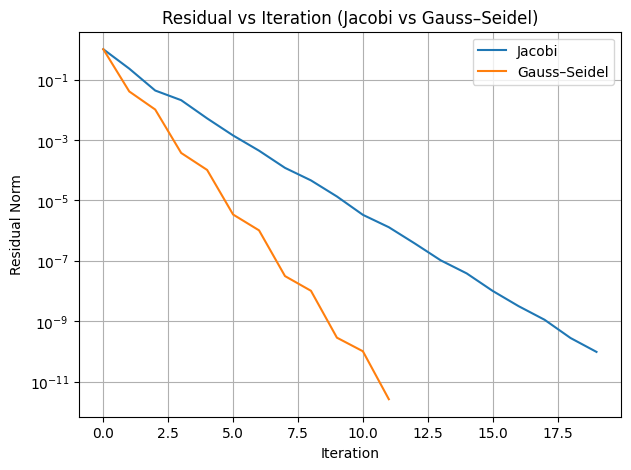

In [304]:
plt.figure(figsize=(7,5))

plt.semilogy(res_j, label="Jacobi")
plt.semilogy(res_g, label="Gauss–Seidel")

plt.xlabel("Iteration")
plt.ylabel("Residual Norm")
plt.title("Residual vs Iteration (Jacobi vs Gauss–Seidel)")
plt.grid(True)
plt.legend()
plt.show()

### A6 Matrix Exponential Applications

In [305]:
ts = [0.1, 0.5, 1.0, 2.0]
exp_tC = {t: expm(t * C) for t in ts}

for t in ts:
    print(f"e^{t}C =\n", exp_tC[t], "\n")


e^0.1C =
 [[ 1.23652591e+00  1.77094704e-02  1.33133944e-01  2.38839240e-01
   5.67810713e-02 -9.14467129e-02 -2.89550075e-02 -1.01115499e-02]
 [ 1.77094704e-02  1.04685595e+00  3.46990771e-03 -6.36925218e-03
  -6.85042078e-02 -6.78792050e-02  1.66980850e-02  3.05349957e-02]
 [ 1.33133944e-01  3.46990771e-03  1.05568408e+00 -3.80517334e-02
  -1.55856568e-01 -6.58583281e-02  3.49884492e-03 -6.21357392e-02]
 [ 2.38839240e-01 -6.36925218e-03 -3.80517334e-02  1.02641715e+00
   1.01895114e-01  1.58411641e-01  1.13362562e-02  6.81661384e-04]
 [ 5.67810713e-02 -6.85042078e-02 -1.55856568e-01  1.01895114e-01
   1.15314840e+00  5.01757077e-02 -5.01923616e-02 -4.32923816e-02]
 [-9.14467129e-02 -6.78792050e-02 -6.58583281e-02  1.58411641e-01
   5.01757077e-02  9.87333337e-01 -1.17889592e-01  2.02584859e-02]
 [-2.89550075e-02  1.66980850e-02  3.49884492e-03  1.13362562e-02
  -5.01923616e-02 -1.17889592e-01  1.00647547e+00 -1.75299739e-02]
 [-1.01115499e-02  3.05349957e-02 -6.21357392e-02  6.816613

In [306]:
P = np.random.randint(0,3,9).reshape(3,3)
E = expm(P)
E_inv = expm(-P)
print(E)
print(E_inv)
print(I)

check_identity = E @ E_inv
print(check_identity)
np.allclose(check_identity, np.eye(3))


[[6.43767754 4.92941437 8.71844501]
 [6.43767754 5.29729381 8.35056557]
 [6.0697981  4.92941437 9.08632445]]
[[ 2.56394767 -0.66712369 -1.84703691]
 [-2.87261598  2.05115814  0.87124491]
 [-0.15433416 -0.66712369  0.87124491]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1.00000000e+00 2.96717585e-14 5.02377736e-14]
 [3.20079508e-14 1.00000000e+00 5.23273321e-14]
 [3.19744231e-14 3.01980663e-14 1.00000000e+00]]


True

In [307]:
ts = [0.1, 0.5, 1.0, 2.0]
exp_tC = {t: expm(t * C) for t in ts}

for t in ts:
    print(f"e^{t}C =\n", exp_tC[t], "\n")



e^0.1C =
 [[ 1.23652591e+00  1.77094704e-02  1.33133944e-01  2.38839240e-01
   5.67810713e-02 -9.14467129e-02 -2.89550075e-02 -1.01115499e-02]
 [ 1.77094704e-02  1.04685595e+00  3.46990771e-03 -6.36925218e-03
  -6.85042078e-02 -6.78792050e-02  1.66980850e-02  3.05349957e-02]
 [ 1.33133944e-01  3.46990771e-03  1.05568408e+00 -3.80517334e-02
  -1.55856568e-01 -6.58583281e-02  3.49884492e-03 -6.21357392e-02]
 [ 2.38839240e-01 -6.36925218e-03 -3.80517334e-02  1.02641715e+00
   1.01895114e-01  1.58411641e-01  1.13362562e-02  6.81661384e-04]
 [ 5.67810713e-02 -6.85042078e-02 -1.55856568e-01  1.01895114e-01
   1.15314840e+00  5.01757077e-02 -5.01923616e-02 -4.32923816e-02]
 [-9.14467129e-02 -6.78792050e-02 -6.58583281e-02  1.58411641e-01
   5.01757077e-02  9.87333337e-01 -1.17889592e-01  2.02584859e-02]
 [-2.89550075e-02  1.66980850e-02  3.49884492e-03  1.13362562e-02
  -5.01923616e-02 -1.17889592e-01  1.00647547e+00 -1.75299739e-02]
 [-1.01115499e-02  3.05349957e-02 -6.21357392e-02  6.816613

Here, as the question implies the hint. Applied e^TC with a loop for t

In [309]:
x0 = np.random.randn(8)    # initial vector of length 8

def x_of_t(t):
    return expm(t * C) @ x0

times = np.linspace(0, 2, 50)
solutions = np.array([x_of_t(t) for t in times])

print(solutions.shape)  # Should be (50, 8)

(50, 8)


In [310]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [311]:
import matplotlib.pyplot as plt

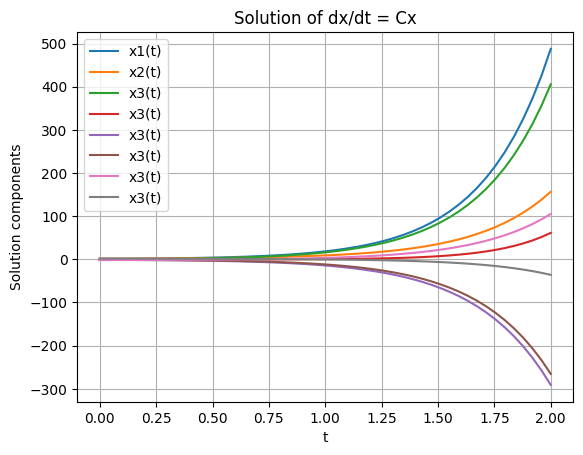

In [319]:
plt.plot(times, solutions[:,0], label='x1(t)')
plt.plot(times, solutions[:,1], label='x2(t)')
plt.plot(times, solutions[:,2], label='x3(t)')
plt.plot(times, solutions[:,3], label='x3(t)')
plt.plot(times, solutions[:,4], label='x3(t)')
plt.plot(times, solutions[:,5], label='x3(t)')
plt.plot(times, solutions[:,6], label='x3(t)')
plt.plot(times, solutions[:,7], label='x3(t)')
plt.xlabel("t")
plt.ylabel("Solution components")
plt.title("Solution of dx/dt = Cx")
plt.legend()
plt.grid(True)
plt.show()

solutions is a 2D array of shape (50, 8) (50 time points × 8 components).solutions[:,0] selects the first component 
x1(t) for all times.Similarly, solutions[:,1] is x2(t) and solutions[:,2] is x3(t).
plt.plot(x, y, label='...') plots y vs x and assigns a label for the legend.

### A8 Kronecker Product and Vectorization


In [245]:
K = np.kron(A,B)
K

array([[12,  9, 12, 32, 24, 32, 36, 27, 36],
       [ 3, 18,  6,  8, 48, 16,  9, 54, 18],
       [24, 18, 12, 64, 48, 32, 72, 54, 36],
       [36, 27, 36, 16, 12, 16,  8,  6,  8],
       [ 9, 54, 18,  4, 24,  8,  2, 12,  4],
       [72, 54, 36, 32, 24, 16, 16, 12,  8],
       [ 0,  0,  0, 24, 18, 24, 36, 27, 36],
       [ 0,  0,  0,  6, 36, 12,  9, 54, 18],
       [ 0,  0,  0, 48, 36, 24, 72, 54, 36]])

In [250]:
A_rank = np.linalg.matrix_rank(A)
B_rank = np.linalg.matrix_rank(B)
K_rank = np.linalg.matrix_rank(K)
K_rank == A_rank*B_rank

np.True_

This proves Rank( A cross B) = rank(A)*rank(B)

In [256]:
X_true = np.random.randint(-1,4,9).reshape(3,3)
C = A @ X_true @ B

# vec(C) in column-major (Fortran) order
vecC = C.reshape(-1, order='F')

# Build M = (B^T ⊗ A)
M = np.kron(B.T, A)

# Solve M vec(X) = vec(C)
vecX = np.linalg.solve(M, vecC)

# Reshape back into 3×3 matrix
X_rec = vecX.reshape(X_true.shape, order='F')
X_rec

array([[-1.77635684e-16,  0.00000000e+00,  3.94745964e-16],
       [ 8.43769499e-16,  0.00000000e+00,  3.00000000e+00],
       [ 3.00000000e+00, -1.00000000e+00, -1.00000000e+00]])

In [259]:
eigA = np.linalg.eig(A)[0]
eigB = np.linalg.eig(B)[0]
eigK = np.linalg.eig(K)[0]


In [262]:
pairwise = np.kron(eigA, eigB)
np.allclose(sorted(pairwise),sorted(eigK))

True

Calculated all eigen values even K for checking if the value matches. Then Pairwise product by using kronecker prodcut for calculating the eigen vlaues

### A7 Generalized EigenValue Problems

In [265]:
import numpy as np
np.random.seed(0)
n = 5
B = np.random.randn(n, n)
alpha = n
M = B.T @ B + alpha * np.eye(n)

eigvals_M = np.linalg.eigvalsh(M)
is_spd = np.all(eigvals_M > 0)
is_spd


np.True_

In [266]:
L = np.linalg.cholesky(M)
L_inv = np.linalg.inv(L)
A_trans = L_inv @ C @ L_inv.T

In [272]:
eigvals, eigvecs_y = np.linalg.eigh(A_trans)
eigvals

array([-0.14121723,  0.04088988,  0.11090458,  0.17172256,  0.21857283])

In [273]:
eigvecs_v = np.linalg.solve(L.T, eigvecs_y)
eigvecs_v

array([[-0.18328375, -0.07209472, -0.15862492,  0.15309852,  0.07315007],
       [-0.16409356, -0.07120352,  0.23345065,  0.09865152, -0.03766356],
       [ 0.10616068,  0.30845997,  0.00414276,  0.24473357,  0.04196003],
       [ 0.27908   , -0.14073847,  0.06131307,  0.03241782, -0.18276976],
       [-0.00205498, -0.15411299, -0.01365884, -0.03110623,  0.25798323]])

In [274]:
Mnorms = np.sqrt(np.sum(eigvecs_v * (M @ eigvecs_v), axis=0))
eigvecs_v = eigvecs_v / Mnorms
eigvecs_v


array([[-0.18328375, -0.07209472, -0.15862492,  0.15309852,  0.07315007],
       [-0.16409356, -0.07120352,  0.23345065,  0.09865152, -0.03766356],
       [ 0.10616068,  0.30845997,  0.00414276,  0.24473357,  0.04196003],
       [ 0.27908   , -0.14073847,  0.06131307,  0.03241782, -0.18276976],
       [-0.00205498, -0.15411299, -0.01365884, -0.03110623,  0.25798323]])

In [275]:
residuals = np.linalg.norm(C @ eigvecs_v - (M @ eigvecs_v) * eigvals.reshape(1, -1), axis=0)
np.max(residuals)

np.float64(4.652682298944613e-16)

In [276]:
M_orth_check = eigvecs_v.T @ (M @ eigvecs_v)
M_orth_check

array([[ 1.00000000e+00, -4.75724576e-17,  1.03192172e-16,
         1.81824581e-16,  2.55666547e-16],
       [ 9.52403928e-18,  1.00000000e+00,  3.67516219e-18,
        -3.96519883e-17,  1.68331944e-16],
       [ 1.76321554e-16, -5.54620060e-18,  1.00000000e+00,
        -5.87376746e-16, -1.03382337e-17],
       [ 1.79139072e-16, -1.56756256e-16, -5.87223406e-16,
         1.00000000e+00, -1.04201626e-16],
       [ 1.66533454e-16,  1.66533454e-16, -6.93889390e-17,
        -1.66533454e-16,  1.00000000e+00]])

In [277]:
np.max(np.abs(M_orth_check - np.diag(np.diag(M_orth_check))))

np.float64(5.873767457624462e-16)

### A9 Matrix Sensitivity Analysis

### A9 Matrix Sensitivity Analysis

In [280]:
eps = 1e-6

E = np.random.randn(*C.shape)
E = E / np.linalg.norm(E, 'fro')

C_tilde = C + eps * E
C_tilde

array([[ 1.76405212, -0.28856024,  0.56139065,  1.28728346, -0.34271592],
       [-0.28856023,  0.95008843,  0.65145823,  0.69542995,  0.53210846],
       [ 0.5613906 ,  0.65145806,  0.76103752, -0.04174207,  0.65414976],
       [ 1.28728366,  0.69542969, -0.0417415 ,  0.31306747, -0.79813037],
       [-0.34271573,  0.53210858,  0.65415001, -0.7981307 ,  2.26975473]])

Here E is the random noise with frobenius norm 1

In [282]:
eig_C = np.linalg.eigvals(C)
eig_Ctilde = np.linalg.eigvals(C_tilde)

In [283]:
rel_err_eigs = np.abs(eig_Ctilde - eig_C) / np.abs(eig_C)
print("Relative eigenvalue errors:\n", rel_err_eigs)

Relative eigenvalue errors:
 [1.22209712e-07 1.15941721e-08 1.19324499e-07 1.03332743e-07
 8.55642781e-07]


In [284]:
maximum_rel_error = max(rel_err_eigs)
maximum_rel_error

np.float64(8.556427808843742e-07)

In [285]:
det_C = np.linalg.det(C)
det_Ctilde = np.linalg.det(C_tilde)

rel_det_err = np.abs(det_Ctilde - det_C) / np.abs(det_C)
print("Relative determinant error:", rel_det_err)

Relative determinant error: 1.2121035624799911e-06


In [286]:
cond_C = np.linalg.cond(C)
print("Condition number of C:", cond_C)

Condition number of C: 12.042161978474237


Interpretation (you add this in your report):

Matrices with large condition number have eigenvalues and determinant that are highly sensitive to tiny perturbations.

If cond(C) is large, even ε = 1e−6 noise can cause large relative errors.

If cond(C) is small, C is well-conditioned and errors stay ≈ ε.

Here C is in the range of 10-10^2 so it is well conditioned that is why the noise did not cause big errors

### A10 Advanced Visualization and Analysis

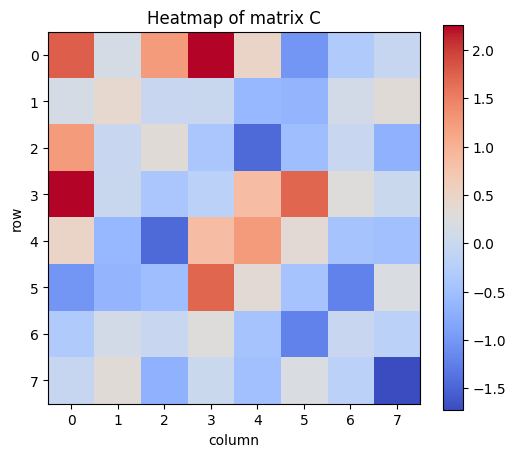

In [288]:
np.random.seed(0)
A = np.random.randn(8, 8)
C = (A + A.T) / 2

plt.figure(figsize=(6,5))
plt.imshow(C, cmap= 'coolwarm',interpolation='nearest')
plt.title("Heatmap of matrix C")
plt.colorbar()
plt.xlabel("column")
plt.ylabel("row")
plt.show()


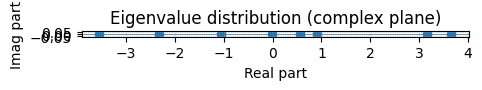

In [289]:
eigvals = np.linalg.eigvals(C) 

plt.figure(figsize=(5,5))
plt.axhline(0, linewidth=0.5)
plt.axvline(0, linewidth=0.5)
plt.scatter(eigvals.real, eigvals.imag)
plt.title("Eigenvalue distribution (complex plane)")
plt.xlabel("Real part")
plt.ylabel("Imag part")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()


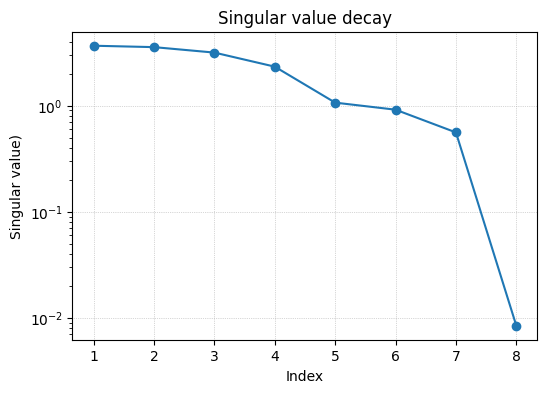

In [293]:
U, s, Vt = np.linalg.svd(C, full_matrices=False)
plt.figure(figsize=(6,4))
plt.semilogy(np.arange(1, len(s)+1), s, marker='o')
plt.title("Singular value decay")
plt.xlabel("Index")
plt.ylabel("Singular value)")
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()
